In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import preprocessing
import re

In [2]:
df1 = pd.read_csv("..//datasets//happiness_2015.csv")
df2 = pd.read_csv("..//datasets//happiness_2016.csv")
df3 = pd.read_csv("..//datasets//happiness_2017.csv")
df4 = pd.read_csv("..//datasets//happiness_2018.csv")

In [3]:
df1.drop(columns=['Region', 'Standard Error'], inplace=True)
df1.rename(columns={"Happiness Rank": "Happiness_Rank", "Happiness Score": "Happiness_Score","Economy (GDP per Capita)":"GDP_per_Capita", "Health (Life Expectancy)":"Health_or_Life Expectancy", "Family":"Social_Support", "Trust (Government Corruption)":"Perceptions_Of_Corruption", "Dystopia Residual":"Dystopia_Residual"}, inplace=True)

In [4]:
df2.drop(columns=['Region', 'Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
df2.rename(columns={"Happiness Rank": "Happiness_Rank", "Happiness Score": "Happiness_Score", "Family":"Social_Support", "Economy (GDP per Capita)":"GDP_per_Capita", "Health (Life Expectancy)":"Health_or_Life Expectancy","Trust (Government Corruption)":"Perceptions_Of_Corruption", "Dystopia Residual":"Dystopia_Residual"}, inplace=True)

In [5]:
df3.drop(columns=['Whisker.high', 'Whisker.low'], inplace=True)
df3.rename(columns={"Happiness.Rank": "Happiness_Rank", "Happiness.Score": "Happiness_Score", "Family":"Social_Support", "Economy..GDP.per.Capita.":"GDP_per_Capita", "Health..Life.Expectancy.":"Health_or_Life Expectancy","Trust..Government.Corruption.":"Perceptions_Of_Corruption", "Dystopia.Residual":"Dystopia_Residual"}, inplace=True)

In [6]:
df4.rename(columns={"GDP_Per_Capita": "GDP_per_Capita", "Rank": "Happiness_Rank", "Score": "Happiness_Score","Healthy_Life_Expectancy":"Health_or_Life Expectancy","Freedom_To_Make_Life_Choices":"Freedom", "Residual":"Dystopia_Residual"}, inplace=True)
df4.dropna(inplace=True)

In [7]:
df1 = df1.set_index('Country')
df2 = df2.set_index('Country')
df3 = df3.set_index('Country')
df4 = df4.set_index('Country')

In [8]:
dfs = pd.merge(pd.merge(pd.merge(df1,df2,on='Country',suffixes=('', '_x')),df3,on='Country',suffixes=('', '_y')),df4,on='Country',suffixes=('', '_z'))

In [9]:
dfs['Happiness_Score_All'] = (dfs['Happiness_Score_x'] + dfs['Happiness_Score_y'] + dfs['Happiness_Score_z'] + dfs['Happiness_Score'])/4
dfs['GDP_per_Capita_All'] = (dfs['GDP_per_Capita_x'] + dfs['GDP_per_Capita_y'] + dfs['GDP_per_Capita_z'] + dfs['GDP_per_Capita'])/4
dfs['Social_Support__All'] = (dfs['Social_Support_x'] + dfs['Social_Support_y'] + dfs['Social_Support_z'] + dfs['Social_Support'])/4
dfs['Health_or_Life Expectancy_All'] = (dfs['Health_or_Life Expectancy_x'] + dfs['Health_or_Life Expectancy_y'] + dfs['Health_or_Life Expectancy_z'] + dfs['Health_or_Life Expectancy'])/4
dfs['Freedom_All'] = (dfs['Freedom_x'] + dfs['Freedom_y'] + dfs['Freedom_z'] + dfs['Freedom'])/4
dfs['Perceptions_Of_Corruption_All'] = (dfs['Perceptions_Of_Corruption_x'] + dfs['Perceptions_Of_Corruption_y'] + dfs['Perceptions_Of_Corruption_z'] + dfs['Perceptions_Of_Corruption'])/4
dfs['Generosity_All'] = (dfs['Generosity_x'] + dfs['Generosity_y'] + dfs['Generosity_z'] + dfs['Generosity'])/4
dfs['Dystopia_Residual_All'] = (dfs['Dystopia_Residual_x'] + dfs['Dystopia_Residual_y'] + dfs['Dystopia_Residual_z'] + dfs['Dystopia_Residual'])/4

In [10]:
dfs = dfs.reset_index()

In [11]:
venezuela_all = dfs.loc[dfs["Country"] == 'Venezuela'].copy()
yemen_all = dfs.loc[dfs["Country"] == 'Yemen'].copy()
liberia_all = dfs.loc[dfs["Country"] == 'Liberia'].copy()
egypt_all = dfs.loc[dfs["Country"] == 'Egypt'].copy()
haiti_all = dfs.loc[dfs["Country"] == 'Haiti'].copy()
spain_all = dfs.loc[dfs["Country"] == 'Spain'].copy()

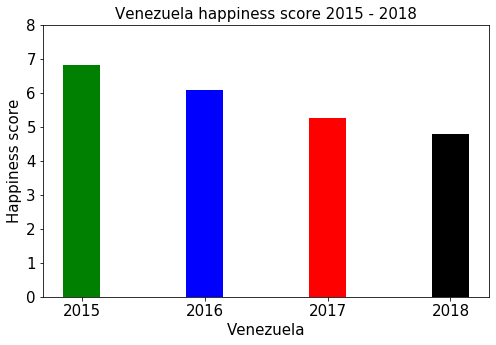

In [12]:
plt.figure(figsize=(8,5))
plt.bar('2015', venezuela_all['Happiness_Score'], color = 'g', width = 0.3)
plt.bar('2016', venezuela_all['Happiness_Score_x'], color = 'b', width = 0.3)
plt.bar('2017', venezuela_all['Happiness_Score_y'], color = 'r', width = 0.3)
plt.bar('2018', venezuela_all['Happiness_Score_z'], color = 'k', width = 0.3)
plt.title('Venezuela happiness score 2015 - 2018', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15)
plt.xlabel('Venezuela', fontsize = 15)
plt.ylim(0, 8)
plt.savefig("..//images//Happiness changes in Venezuela.jpg")
plt.show()

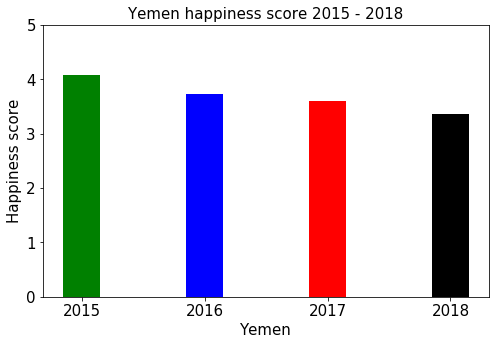

In [13]:
plt.figure(figsize=(8,5))
plt.bar('2015', yemen_all['Happiness_Score'], color = 'g', width = 0.3)
plt.bar('2016', yemen_all['Happiness_Score_x'], color = 'b', width = 0.3)
plt.bar('2017', yemen_all['Happiness_Score_y'], color = 'r', width = 0.3)
plt.bar('2018', yemen_all['Happiness_Score_z'], color = 'k', width = 0.3)
plt.title('Yemen happiness score 2015 - 2018', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(0, 5)
plt.ylabel('Happiness score', fontsize = 15)
plt.xlabel('Yemen', fontsize = 15)
plt.savefig("..//images//Happiness changes in Yemen.jpg")
plt.show()

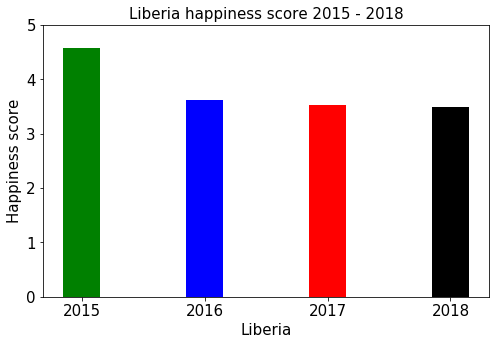

In [14]:
plt.figure(figsize=(8,5))
plt.bar('2015', liberia_all['Happiness_Score'], color = 'g', width = 0.3)
plt.bar('2016', liberia_all['Happiness_Score_x'], color = 'b', width = 0.3)
plt.bar('2017', liberia_all['Happiness_Score_y'], color = 'r', width = 0.3)
plt.bar('2018', liberia_all['Happiness_Score_z'], color = 'k', width = 0.3)
plt.title('Liberia happiness score 2015 - 2018', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15)
plt.xlabel('Liberia', fontsize = 15)
plt.ylim(0, 5)
plt.savefig("..//images//Happiness changes in Liberia.jpg")
plt.show()

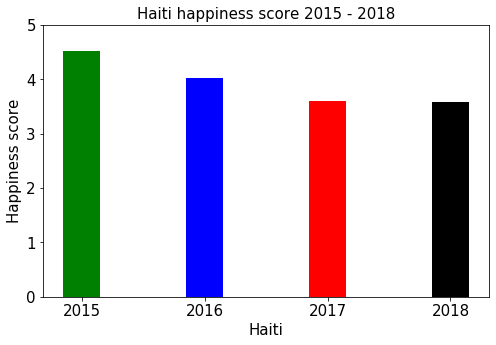

In [15]:
plt.figure(figsize=(8,5))
plt.bar('2015', haiti_all['Happiness_Score'], color = 'g', width = 0.3)
plt.bar('2016', haiti_all['Happiness_Score_x'], color = 'b', width = 0.3)
plt.bar('2017', haiti_all['Happiness_Score_y'], color = 'r', width = 0.3)
plt.bar('2018', haiti_all['Happiness_Score_z'], color = 'k', width = 0.3)
plt.title('Haiti happiness score 2015 - 2018', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15)
plt.xlabel('Haiti', fontsize = 15)
plt.ylim(0, 5)
plt.savefig("..//images//Happiness changes in Haiti.jpg")
plt.show()

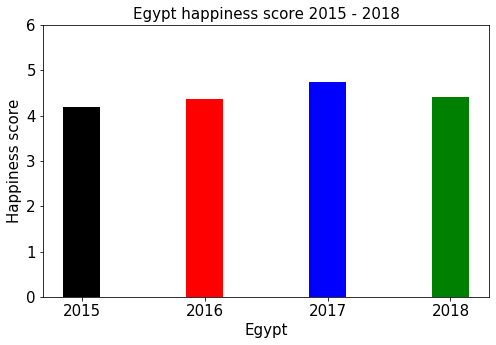

In [16]:
plt.figure(figsize=(8,5))
plt.bar('2015', egypt_all['Happiness_Score'], color = 'k', width = 0.3)
plt.bar('2016', egypt_all['Happiness_Score_x'], color = 'r', width = 0.3)
plt.bar('2017', egypt_all['Happiness_Score_y'], color = 'b', width = 0.3)
plt.bar('2018', egypt_all['Happiness_Score_z'], color = 'g', width = 0.3)
plt.title('Egypt happiness score 2015 - 2018', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15)
plt.xlabel('Egypt', fontsize = 15)
plt.ylim(0, 6)
plt.savefig("..//images//Happiness changes in Egypt.jpg")
plt.show()

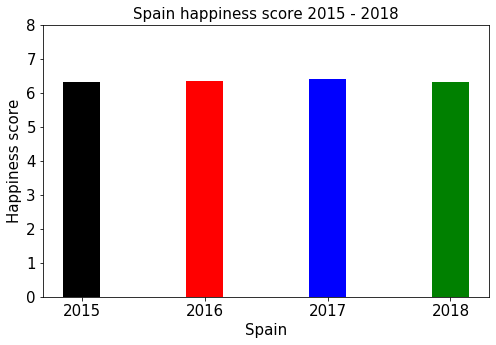

In [17]:
plt.figure(figsize=(8,5))
plt.bar('2015', spain_all['Happiness_Score'], color = 'k', width = 0.3)
plt.bar('2016', spain_all['Happiness_Score_x'], color = 'r', width = 0.3)
plt.bar('2017', spain_all['Happiness_Score_y'], color = 'b', width = 0.3)
plt.bar('2018', spain_all['Happiness_Score_z'], color = 'g', width = 0.3)
plt.title('Spain happiness score 2015 - 2018', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15)
plt.xlabel('Spain', fontsize = 15)
plt.ylim(0, 8)
plt.savefig("..//images//Happiness changes in Spain.jpg")
plt.show()

In [18]:
dfs.drop(columns=['Happiness_Rank', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support',
       'Health_or_Life Expectancy', 'Freedom', 'Perceptions_Of_Corruption',
       'Generosity', 'Dystopia_Residual', 'Happiness_Rank_x',
       'Happiness_Score_x', 'GDP_per_Capita_x', 'Social_Support_x',
       'Health_or_Life Expectancy_x', 'Freedom_x',
       'Perceptions_Of_Corruption_x', 'Generosity_x', 'Dystopia_Residual_x',
        'Happiness_Rank_y', 'Happiness_Score_y', 'GDP_per_Capita_y',
       'Social_Support_y', 'Health_or_Life Expectancy_y', 'Freedom_y',
       'Generosity_y', 'Perceptions_Of_Corruption_y', 'Dystopia_Residual_y',
       'Happiness_Rank_z', 'Happiness_Score_z', 'GDP_per_Capita_z',
       'Social_Support_z', 'Health_or_Life Expectancy_z', 'Freedom_z',
       'Generosity_z', 'Perceptions_Of_Corruption_z', 'Dystopia_Residual_z'], inplace=True)


dfs = dfs.sort_values(["Happiness_Score_All"],ascending=False)

In [19]:
dfs.to_csv('..//datasets//Happiness_combined_years.csv', index=False)

In [20]:
countries = ["Norway", "Denmark", "Switzerland", "Iceland", 'Finland', 'Netherlands', 'Australia', 'Sweden', 'Canada','New Zealand', 'Spain', 'Egypt', 'Tanzania', 'Afghanistan', 'Rwanda', 'Togo', 'Syria', 'Burundi']
countries_to_plot = pd.DataFrame()
for i in countries:
    row = dfs.loc[dfs['Country'] == i]
    countries_to_plot = countries_to_plot.append(row)
countries_to_plot = countries_to_plot.sort_values(by='Happiness_Score_All', ascending=False)

In [21]:
lst_of_scores = list(countries_to_plot['Happiness_Score_All'])
lst_of_scores = [ '%.3f' % elem for elem in lst_of_scores]

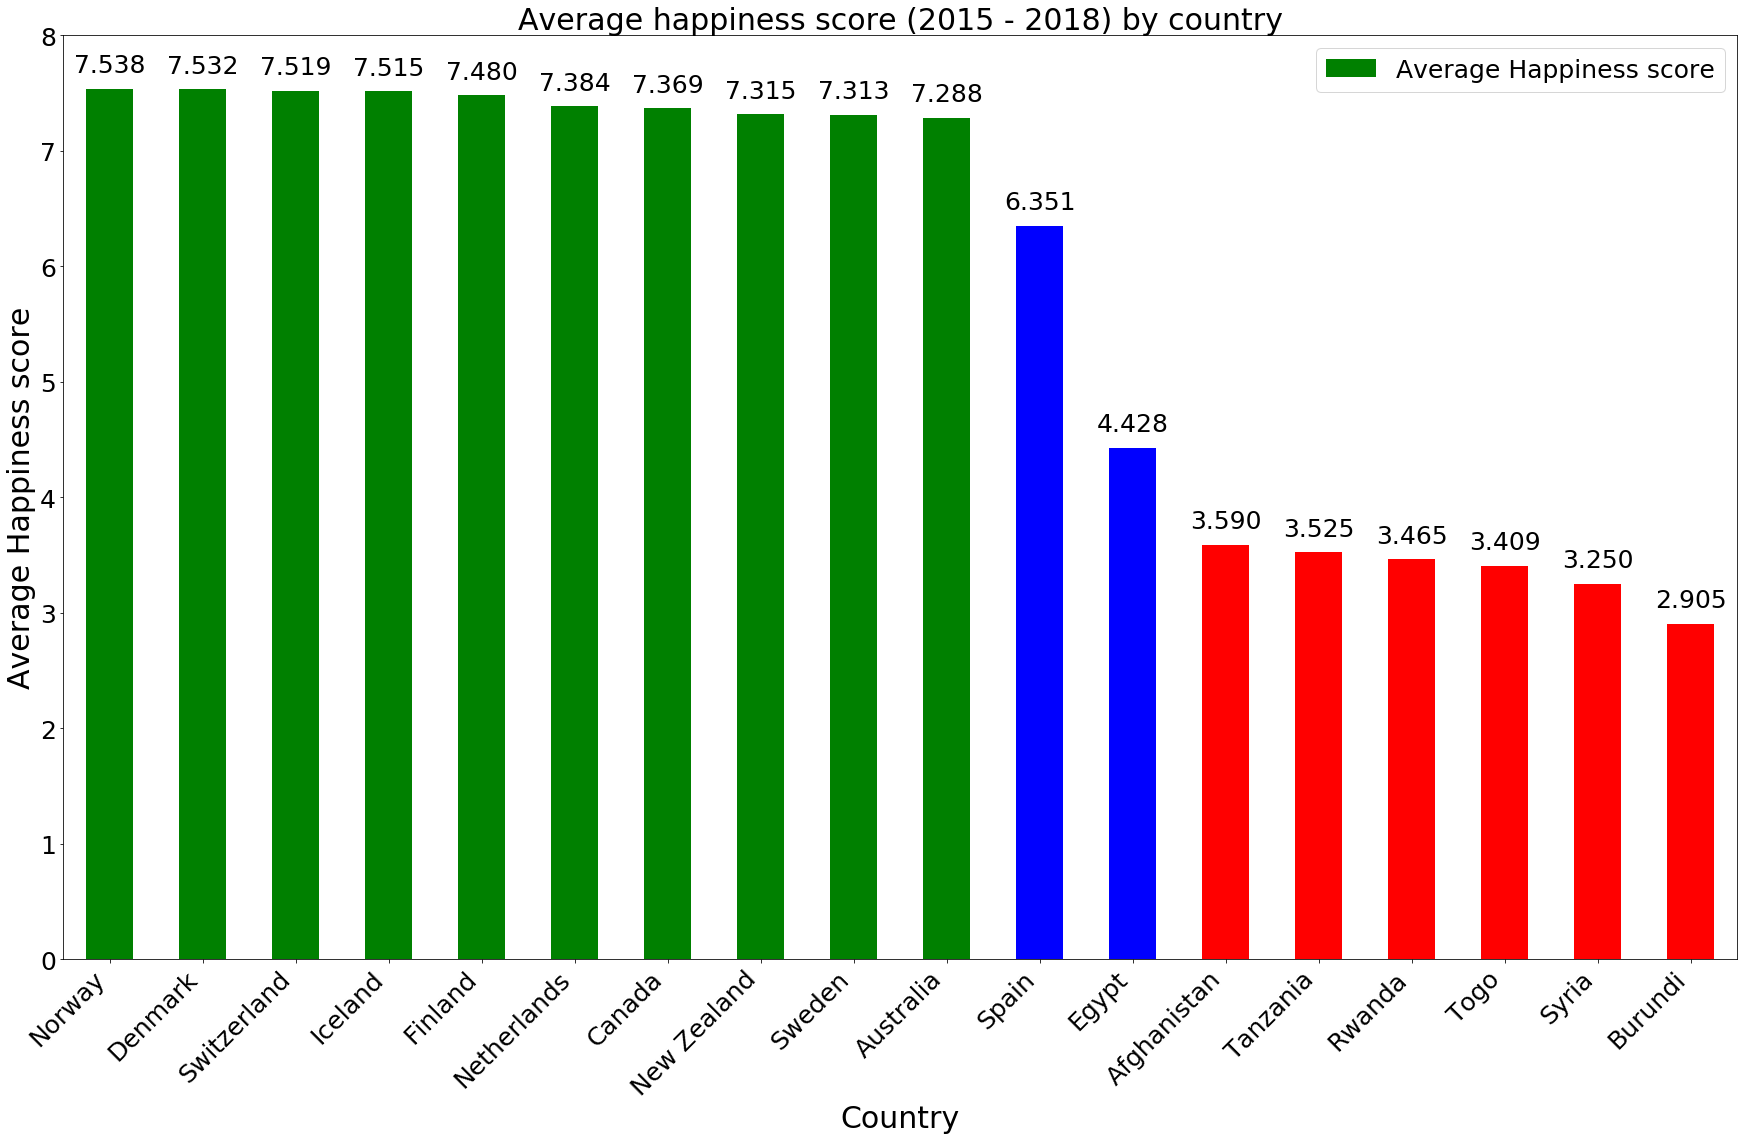

In [22]:
colors = ['g','g','g','g','g','g','g','g','g','g','b','b','r','r','r','r','r', 'r']
chart1 = countries_to_plot.plot(x='Country', y='Happiness_Score_All', kind='bar', color=colors, figsize=(30,17))
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=45,horizontalalignment='right',fontweight='light',fontsize=25)

rects = chart1.patches
labels=lst_of_scores
for rect, label in zip(rects, labels):
    height = rect.get_height()
    chart1.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom', fontsize=25)

plt.yticks(fontsize=25)
plt.xlabel('Country', fontsize=30)
plt.ylabel('Average Happiness score', fontsize=30)
plt.title('Average happiness score (2015 - 2018) by country', fontsize=30)
plt.legend(["Average Happiness score"], fontsize=25)
plt.ylim(0,8)
plt.savefig("..//images//Countries by rank.jpg")
plt.show()

In [23]:
countries_to_plot = countries_to_plot.set_index('Country')
countries_to_plot_no_score = countries_to_plot.drop(columns=['Happiness_Score_All'])

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


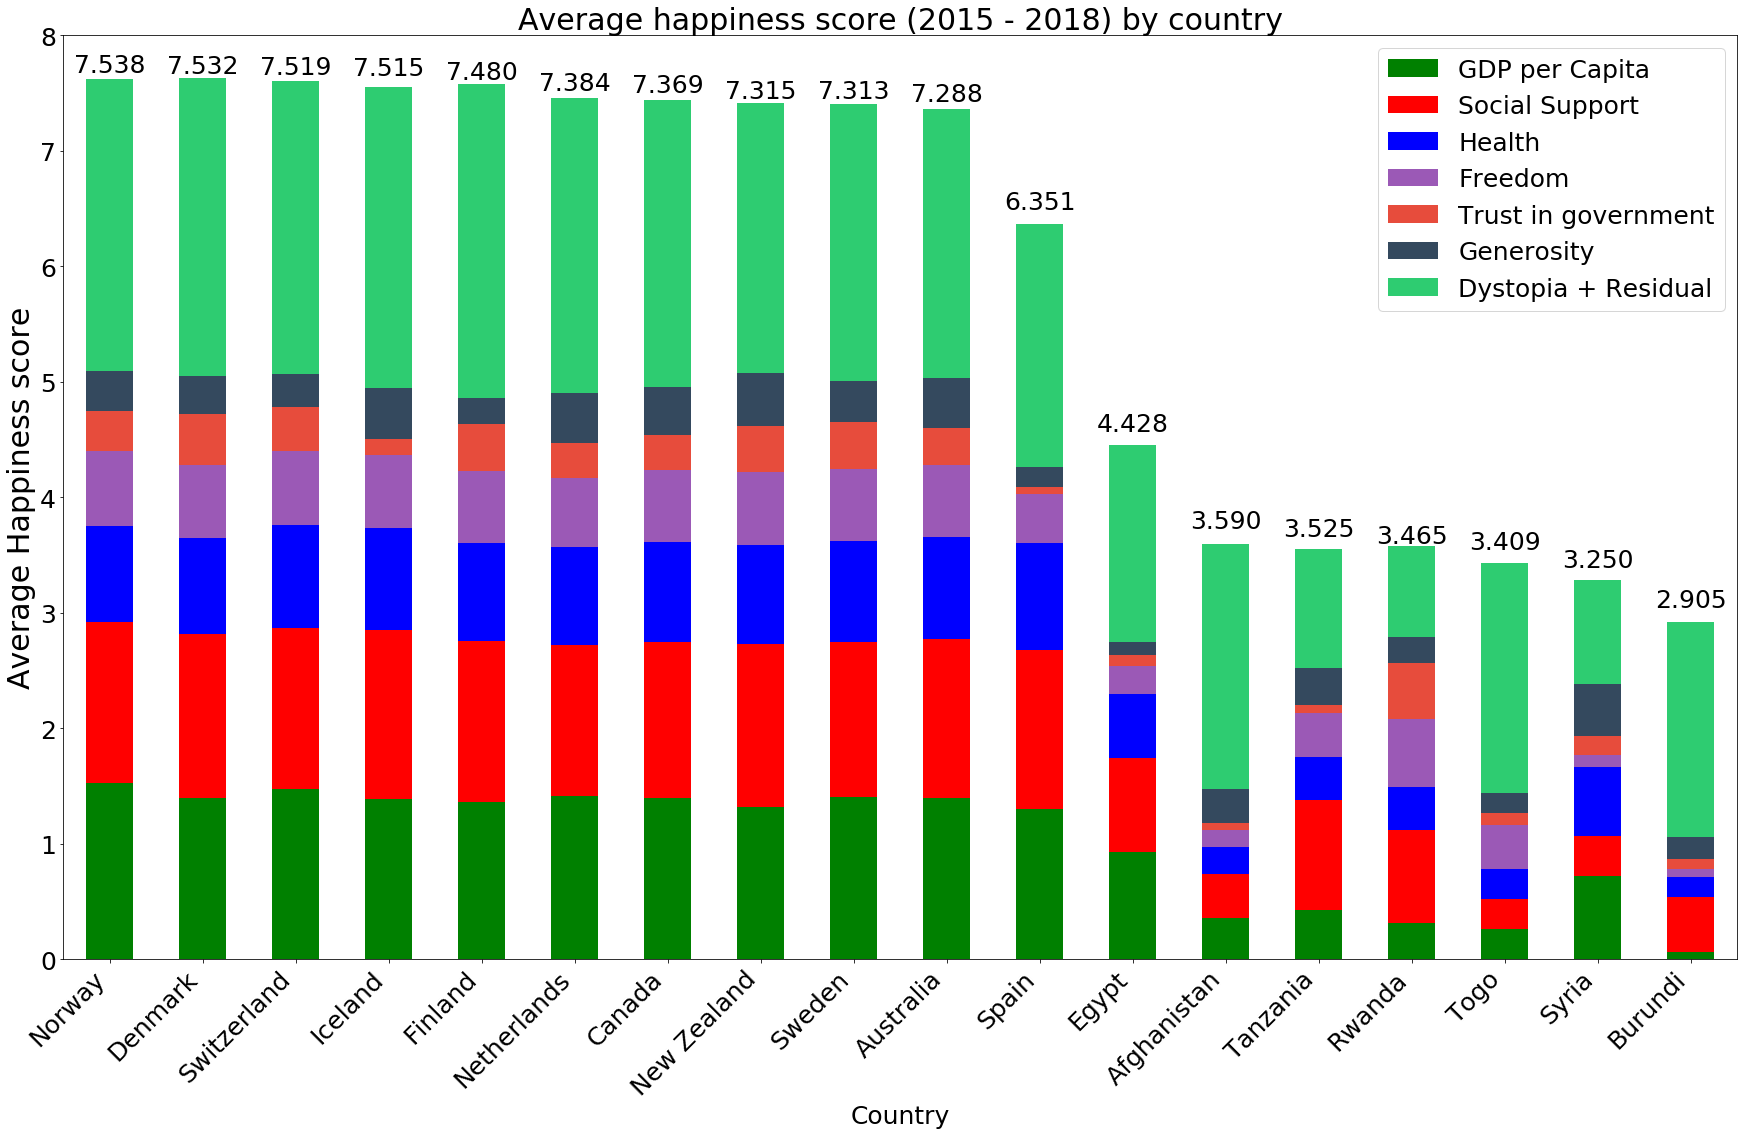

In [25]:
list_of_colors = ["g", "r", "b", "#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
labels = ['GDP per Capita', 'Social Support','Health', 'Freedom','Trust in government', 'Generosity','Dystopia + Residual']
chart2 = countries_to_plot_no_score.plot(kind='bar', stacked=True, figsize=(30,17), colors=list_of_colors)
chart2.set_xticklabels(chart2.get_xticklabels(),rotation=45,horizontalalignment='right',fontweight='light',fontsize=25)

rects = chart2.patches
labels2 =lst_of_scores
for rect, label in zip(rects, labels2):
    height = rect.get_height()
    chart2.text(rect.get_x() + rect.get_width()/2, float(label) + 0.1, label, ha='center', va='bottom', fontsize=25)

plt.yticks(fontsize=25)
plt.legend(labels, fontsize=25)
plt.xlabel('Country', fontsize=25)
plt.ylabel('Average Happiness score', fontsize=30)
plt.title('Average happiness score (2015 - 2018) by country', fontsize=30)
plt.ylim(0,8)
plt.savefig("..//images//Countries by rank 2.jpg")
plt.show()

In [26]:
working_hours = pd.read_csv("..//datasets//annual-working-hours.csv")

In [27]:
working_hours.drop(columns=['Code'], inplace=True)
working_hours.rename(columns={"Entity": "Country", "Average annual hours worked by persons engaged (hours per person engaged)": "Average_working_hours"}, inplace=True)

In [28]:
working_hours = working_hours.query('Year == 2015 or Year == 2016 or Year == 2017 or Year == 2018')

In [29]:
working_hours = working_hours.groupby('Country').agg({'Average_working_hours': 'mean'})

In [30]:
dfs = dfs.set_index('Country')

In [31]:
happiness_and_working_hrs = pd.merge(dfs,working_hours,on='Country')

In [32]:
happiness_and_working_hrs = happiness_and_working_hrs.sort_values(["Happiness_Score_All"],ascending=False)

In [33]:
happiness_and_working_hrs.drop(columns=['GDP_per_Capita_All', 'Social_Support__All','Health_or_Life Expectancy_All', 'Freedom_All','Perceptions_Of_Corruption_All', 'Generosity_All','Dystopia_Residual_All'], inplace=True)

In [34]:
happiness_and_working_hrs = happiness_and_working_hrs.reset_index()

The slope is: -166.1623014244086
The intercept is: 2871.8142133855545
The correlation is: -0.6073747448135308
The covarience is: -149.38323429044726


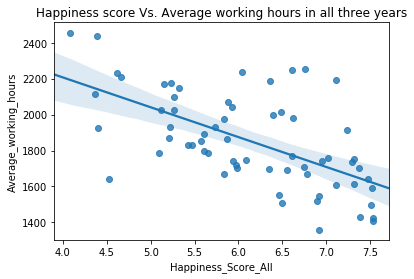

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_and_working_hrs['Happiness_Score_All'], happiness_and_working_hrs["Average_working_hours"])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The correlation is: ' + str(happiness_and_working_hrs['Happiness_Score_All'].corr(happiness_and_working_hrs["Average_working_hours"])))
print ('The covarience is: ' + str(happiness_and_working_hrs['Happiness_Score_All'].cov(happiness_and_working_hrs["Average_working_hours"])))
sns.regplot(x='Happiness_Score_All',y='Average_working_hours' , data=happiness_and_working_hrs)
plt.title("Happiness score Vs. Average working hours in all three years")
plt.show()

In [36]:
X = sm.add_constant(happiness_and_working_hrs[['Happiness_Score_All']])
model = sm.OLS(happiness_and_working_hrs.Average_working_hours,X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Average_working_hours   R-squared:                       0.369
Model:                               OLS   Adj. R-squared:                  0.359
Method:                    Least Squares   F-statistic:                     36.24
Date:                   Thu, 28 Nov 2019   Prob (F-statistic):           1.03e-07
Time:                           11:45:17   Log-Likelihood:                -431.31
No. Observations:                     64   AIC:                             866.6
Df Residuals:                         62   BIC:                             870.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
happiness_and_working_hrs.to_csv('..//datasets//happiness_and_working_hrs.csv', index=False)

In [38]:
alcohol_consumption = pd.read_csv("..//datasets//alcohol_consumption.csv")

In [39]:
alcohol_consumption.drop(columns=['beer_servings', 'spirit_servings', 'wine_servings', 'continent'], inplace=True)
alcohol_consumption.rename(columns={"country": "Country", 'total_litres_of_pure_alcohol': "Average_alcohol_consumption"}, inplace=True)

In [40]:
alcohol_consumption = alcohol_consumption.set_index('Country')

In [41]:
happiness_and_alcohol_consumption = pd.merge(dfs,alcohol_consumption,on='Country')

In [42]:
happiness_and_alcohol_consumption.drop(columns=['GDP_per_Capita_All', 'Social_Support__All','Health_or_Life Expectancy_All', 'Freedom_All','Perceptions_Of_Corruption_All', 'Generosity_All','Dystopia_Residual_All'], inplace=True)

In [43]:
happiness_and_alcohol_consumption = happiness_and_alcohol_consumption.reset_index()

The slope is: 1.5869631047396817
The intercept is: -3.471179544458213
The correlation is: 0.4595306656325678
The covarience is: 2.0412875071076257


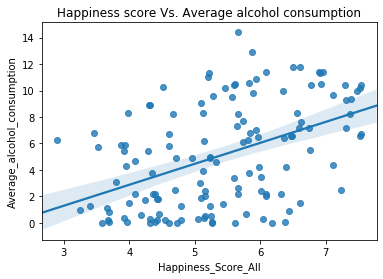

In [44]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_and_alcohol_consumption['Happiness_Score_All'], happiness_and_alcohol_consumption["Average_alcohol_consumption"])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The correlation is: ' + str(happiness_and_alcohol_consumption['Happiness_Score_All'].corr(happiness_and_alcohol_consumption["Average_alcohol_consumption"])))
print ('The covarience is: ' + str(happiness_and_alcohol_consumption['Happiness_Score_All'].cov(happiness_and_alcohol_consumption["Average_alcohol_consumption"])))
sns.regplot(x='Happiness_Score_All',y='Average_alcohol_consumption' , data=happiness_and_alcohol_consumption)
plt.title("Happiness score Vs. Average alcohol consumption")
plt.show()

In [45]:
X = sm.add_constant(happiness_and_alcohol_consumption[['Happiness_Score_All']])
model = sm.OLS(happiness_and_alcohol_consumption.Average_alcohol_consumption,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Average_alcohol_consumption   R-squared:                       0.211
Model:                                     OLS   Adj. R-squared:                  0.205
Method:                          Least Squares   F-statistic:                     35.60
Date:                         Thu, 28 Nov 2019   Prob (F-statistic):           2.07e-08
Time:                                 11:45:18   Log-Likelihood:                -359.35
No. Observations:                          135   AIC:                             722.7
Df Residuals:                              133   BIC:                             728.5
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [46]:
happiness_and_alcohol_consumption.to_csv('..//datasets//happiness_and_alcohol_consumption.csv', index=False)

In [47]:
suicide = pd.read_csv("..//datasets//who_suicide_statistics.csv")

In [48]:
suicide.drop(columns=['sex', 'age'], inplace=True)
suicide.rename(columns={"country": "Country", 'year': "Year", "suicides_no":"Number_of_Suicides"}, inplace=True)

In [49]:
suicide = suicide.query('Year == 2015 or Year == 2016 or Year == 2017 or Year == 2018')

In [50]:
suicide = suicide.groupby('Country').agg({'Number_of_Suicides': 'sum', 'population':'sum'})

In [51]:
suicide = suicide.rename(index={'United States of America': 'United States'})

In [52]:
suicide['Suicide_percentage'] = (suicide['Number_of_Suicides'] /  suicide['population']) * 100

In [53]:
suicide = suicide.replace([np.inf, -np.inf], np.nan)

In [54]:
suicide.dropna(inplace=True)

In [55]:
happiness_and_suicide = pd.merge(dfs, suicide,on='Country')

In [56]:
happiness_and_suicide.drop(columns=['GDP_per_Capita_All', 'Social_Support__All','Health_or_Life Expectancy_All', 'Freedom_All','Perceptions_Of_Corruption_All', 'Generosity_All','Dystopia_Residual_All', 'Number_of_Suicides', 'population'], inplace=True)

In [57]:
happiness_and_suicide = happiness_and_suicide.reset_index()

In [58]:
# data = np.array(happiness_and_working_hrs_and_gdp['Average_GDP'])
# data = data.reshape(-1, 1)
# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(data)
# df_normalized = pd.DataFrame(np_scaled)
# happiness_and_working_hrs_and_gdp['Average_GDP'] = df_normalized

The slope is: 0.0008789717881162429
The intercept is: 0.0048486341142865
The correlation is: 0.12034568750282677
The covarience is: 0.000729393881948991


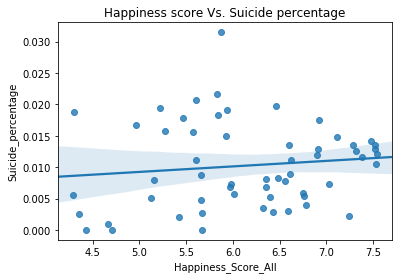

In [59]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_and_suicide['Happiness_Score_All'], happiness_and_suicide['Suicide_percentage'])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The correlation is: ' + str(happiness_and_suicide['Happiness_Score_All'].corr(happiness_and_suicide['Suicide_percentage'])))
print ('The covarience is: ' + str(happiness_and_suicide['Happiness_Score_All'].cov(happiness_and_suicide['Suicide_percentage'])))
sns.regplot(x='Happiness_Score_All',y='Suicide_percentage' , data=happiness_and_suicide)
plt.title("Happiness score Vs. Suicide percentage")
plt.show()

In [60]:
X = sm.add_constant(happiness_and_suicide[['Happiness_Score_All']])
model = sm.OLS(happiness_and_suicide.Suicide_percentage,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Suicide_percentage   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8083
Date:                Thu, 28 Nov 2019   Prob (F-statistic):              0.373
Time:                        11:45:21   Log-Likelihood:                 205.76
No. Observations:                  57   AIC:                            -407.5
Df Residuals:                      55   BIC:                            -403.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0048    

In [61]:
happiness_and_suicide.to_csv('..//datasets//happiness_and_suicide.csv', index=False)

In [62]:
obesity = pd.read_csv("..//datasets//obesity.csv")

In [63]:
obesity = obesity.drop([0,1,2])

In [64]:
columns_to_remove = list(obesity.columns)
to_remove = ["Unnamed: 0", "2016", "2015", "2014"]
for i in to_remove:
    columns_to_remove.remove(i)

In [65]:
obesity.drop(columns=columns_to_remove, inplace=True)

In [66]:
obesity.rename(columns={'Unnamed: 0': "Country"}, inplace=True)
obesity = obesity.reset_index()
obesity.drop(columns="index", inplace=True)

In [67]:
obesity['2016'] = obesity['2016'].str.replace(r' \[(.*?)\]', '')
obesity['2015'] = obesity['2015'].str.replace(r' \[(.*?)\]', '')
obesity['2014'] = obesity['2014'].str.replace(r' \[(.*?)\]', '')

In [68]:
obesity["2014"] = obesity["2014"].convert_objects(convert_numeric=True)
obesity["2015"] = obesity["2015"].convert_objects(convert_numeric=True)
obesity["2016"] = obesity["2016"].convert_objects(convert_numeric=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package s

In [69]:
obesity['Average_obesity'] = (obesity['2014'] + obesity['2015'] + obesity['2016'])/3

In [70]:
obesity.drop(columns=["2016","2015","2014"], inplace=True)
obesity = obesity.set_index('Country')

In [71]:
happiness_and_obesity = pd.merge(dfs, obesity,on='Country')

In [72]:
happiness_and_obesity.dropna(inplace=True)

In [73]:
happiness_and_obesity.drop(columns=['GDP_per_Capita_All', 'Social_Support__All','Health_or_Life Expectancy_All', 'Freedom_All','Perceptions_Of_Corruption_All', 'Generosity_All','Dystopia_Residual_All'], inplace=True)

In [74]:
happiness_and_obesity = happiness_and_obesity.reset_index()

The slope is: 8.8751206662181
The intercept is: -0.2867316687015986
The correlation is: 0.632817142292163
The covarience is: 11.42159956501891


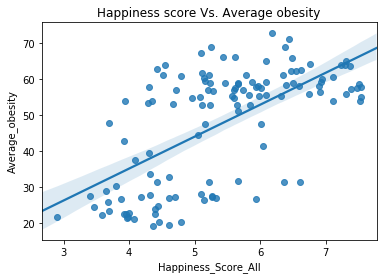

In [75]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_and_obesity['Happiness_Score_All'], happiness_and_obesity["Average_obesity"])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The correlation is: ' + str(happiness_and_obesity['Happiness_Score_All'].corr(happiness_and_obesity["Average_obesity"])))
print ('The covarience is: ' + str(happiness_and_obesity['Happiness_Score_All'].cov(happiness_and_obesity["Average_obesity"])))
sns.regplot(x='Happiness_Score_All',y='Average_obesity' , data=happiness_and_obesity)
plt.title("Happiness score Vs. Average obesity")
plt.show()

In [76]:
X = sm.add_constant(happiness_and_obesity[['Happiness_Score_All']])
model = sm.OLS(happiness_and_obesity.Average_obesity,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Average_obesity   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     81.49
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           3.15e-15
Time:                        11:45:23   Log-Likelihood:                -486.83
No. Observations:                 124   AIC:                             977.7
Df Residuals:                     122   BIC:                             983.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2867    

In [77]:
happiness_and_obesity.to_csv('..//datasets//happiness_and_obesity.csv', index=False)